In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import sys
import os


current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '..'))

import ETL.utils as ut

In [3]:
# Load datasets

steam_games_df = pd.read_csv('../data/generated/steam_games.csv',dtype={'id': str})
items_df = pd.read_csv('../data/generated/items.csv', dtype={'item_id': str})
reviews_df = pd.read_csv('../data/generated/reviews_sentiment.csv', dtype={'item_id': str})


#### The string columns of the dataframes are recognized as 'object.' In this step, we ensure they are treated as strings for proper information processing.

In [4]:
columnas_object = steam_games_df.select_dtypes(include=['object']).columns
steam_games_df[columnas_object] = steam_games_df[columnas_object].astype(str)

columnas_object = items_df.select_dtypes(include=['object']).columns
items_df[columnas_object] = items_df[columnas_object].astype(str)

columnas_object = reviews_df.select_dtypes(include=['object']).columns
reviews_df[columnas_object] = reviews_df[columnas_object].astype(str)

#### Generation of documents to examine statistical analysis of the dataframes.

##### These reports are generated after performing the basic ETL where nulls, duplicates, and data types were reviewed.

In [11]:
# Function to perform statistical analysis on numeric columns
def numeric_analysis(df, df_name):
    print(f"Statistical analysis for {df_name} (numeric columns):\n")
    for column in df.select_dtypes(include=['number']).columns:
        print(f"Column: {column}")
        print(f"  Median: {df[column].median()}")
        print(f"  1st Quartile: {df[column].quantile(0.25)}")
        print(f"  3rd Quartile: {df[column].quantile(0.75)}")
        print(f"  Minimum: {df[column].min()}")
        print(f"  Maximum: {df[column].max()}\n")

# Function to perform frequency analysis on string columns
def string_frequency_analysis(df, df_name):
    print(f"Frequency analysis for {df_name} (string columns):\n")
    for column in df.select_dtypes(include=['object']).columns:
        frequency = df[column].value_counts()
        print(f"Frequency for {column}:\n{frequency}\n")

# Apply the functions to each DataFrame
numeric_analysis(steam_games_df, "steam_games_df")
numeric_analysis(reviews_df, "reviews_df")
numeric_analysis(items_df, "items_df")

string_frequency_analysis(steam_games_df, "steam_games_df")
string_frequency_analysis(reviews_df, "reviews_df")
string_frequency_analysis(items_df, "items_df")

Statistical analysis for steam_games_df (numeric columns):

Column: price
  Median: 4.99
  1st Quartile: 2.99
  3rd Quartile: 9.99
  Minimum: 0.0
  Maximum: 995.0

Statistical analysis for reviews_df (numeric columns):

Column: sentiment_analysis
  Median: 2.0
  1st Quartile: 1.0
  3rd Quartile: 2.0
  Minimum: 0
  Maximum: 2

Statistical analysis for items_df (numeric columns):

Column: items_count
  Median: 26.0
  1st Quartile: 3.0
  3rd Quartile: 73.0
  Minimum: 0
  Maximum: 7762

Column: steam_id
  Median: 7.65611980668154e+16
  1st Quartile: 7.65611980451629e+16
  3rd Quartile: 7.656119808321554e+16
  Minimum: 76561197960269200
  Maximum: 76561198331598578

Column: playtime_forever
  Median: 788.0
  1st Quartile: 58.0
  3rd Quartile: 3600.437178339673
  Minimum: 0.0
  Maximum: 388621.0

Column: playtime_2weeks
  Median: 0.0
  1st Quartile: 0.0
  3rd Quartile: 0.0
  Minimum: 0.0
  Maximum: 14201.0

Frequency analysis for steam_games_df (string columns):

Frequency for publisher:
pub

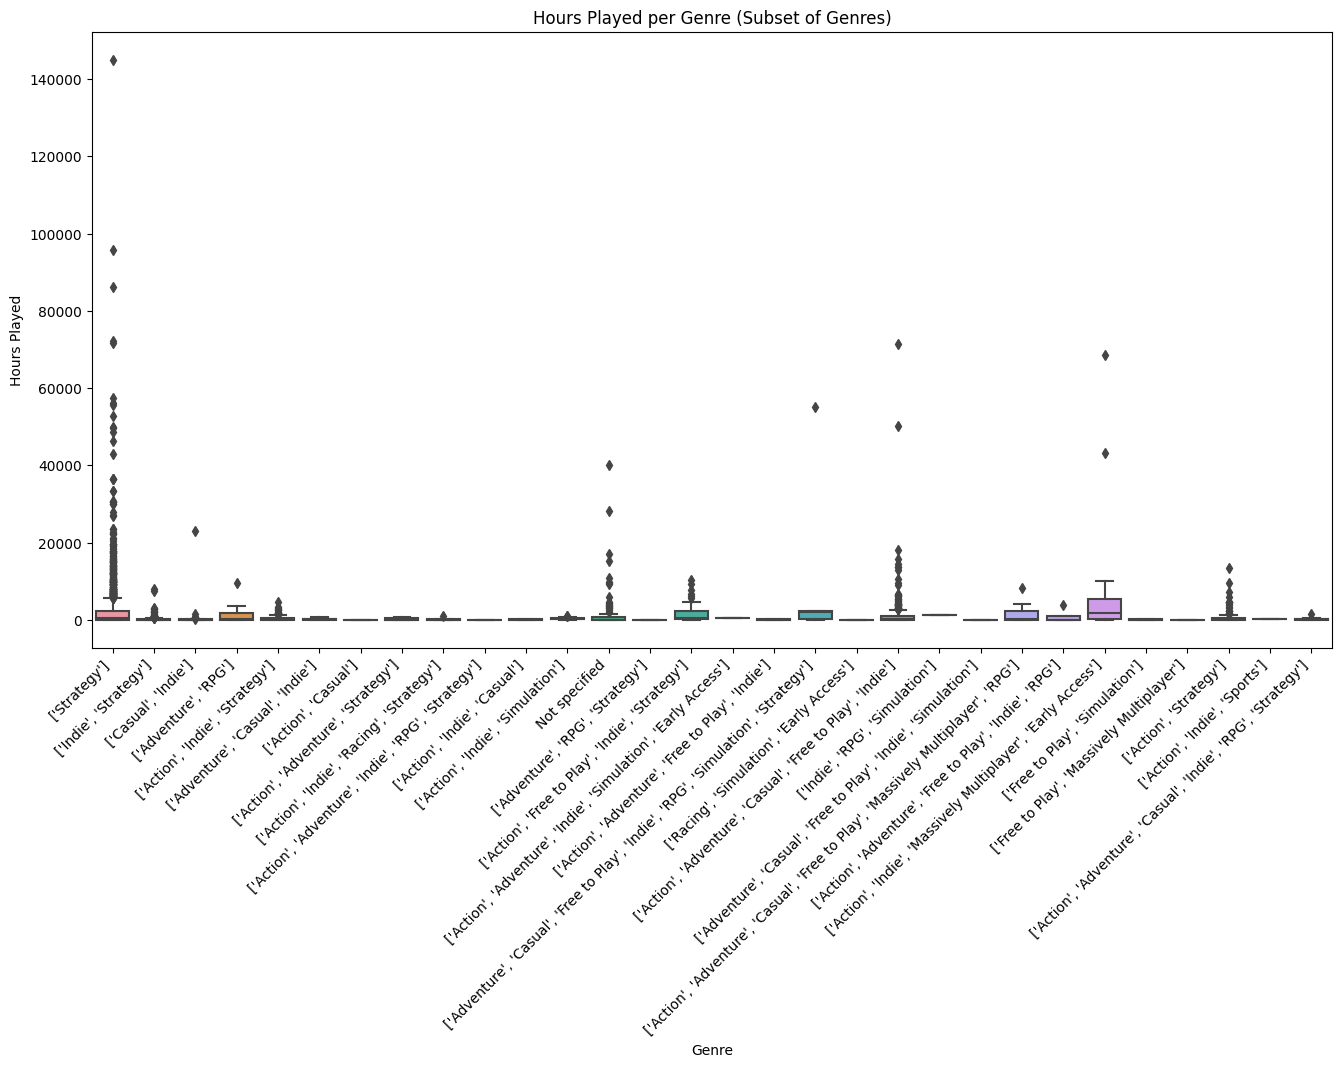

In [36]:
# Merge 'steam_games_df' with 'items_df' using 'item_id' as the joining key
import random

merged_df = pd.merge(steam_games_df[['id', 'genres']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

# Randomly select 10 genres for display in the boxplot
selected_genres = random.sample(list(merged_df['genres'].unique()), 30)

# Filter the DataFrame to include only the selected genres
subset_df = merged_df[merged_df['genres'].isin(selected_genres)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='genres', y='playtime_forever', data=subset_df)
plt.title('Hours Played per Genre (Subset of Genres)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Hours Played')
plt.show()


Brief conclusions from the video game genres chart on Steam:
Most popular genres: Strategy, Indie, Casual, RPG.
Most common combinations: Action (with 17 combinations), Adventure, Indie, Strategy (with 12 combinations each).
Unrelated genre tag most common: Free to Play (9 combinations).
Least common genre: Massively multiplayer (only 1 appearance).
Observation: A wide variety of genre combinations available.

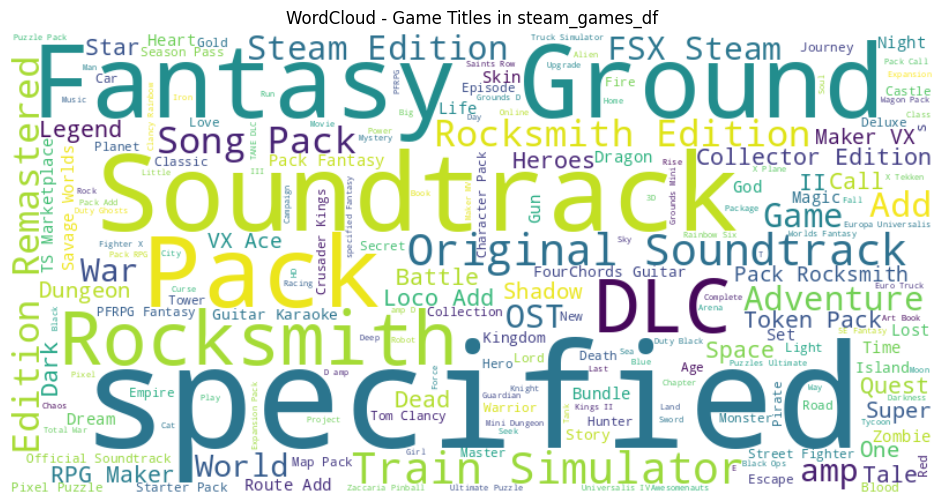

In [37]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(steam_games_df['title']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Game Titles in steam_games_df')
plt.show()

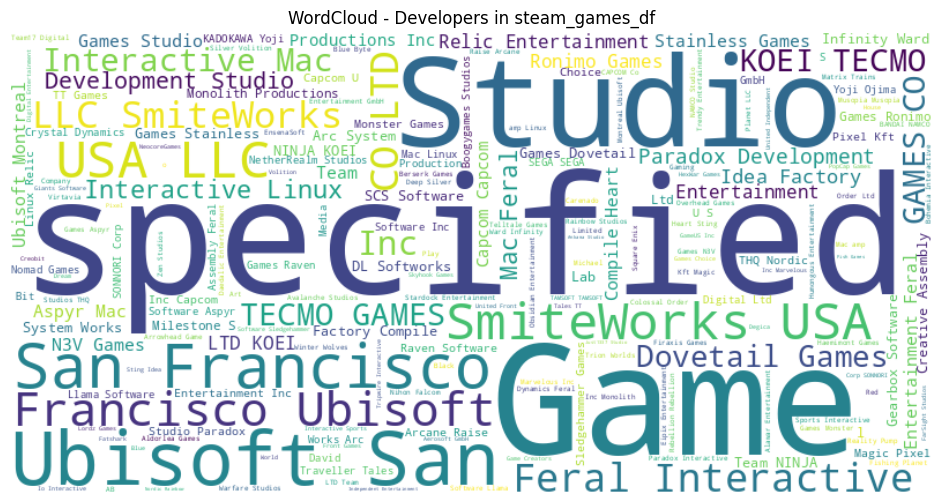

In [38]:
wordcloud_developers = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(steam_games_df['developer']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_developers, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Developers in steam_games_df')
plt.show()


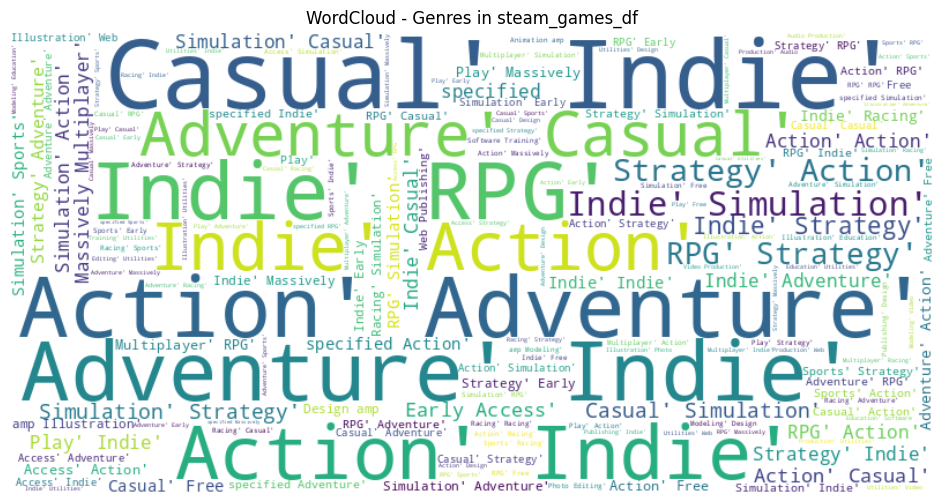

In [50]:
wordcloud_developers = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(steam_games_df['genres']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_developers, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Genres in steam_games_df')
plt.show()

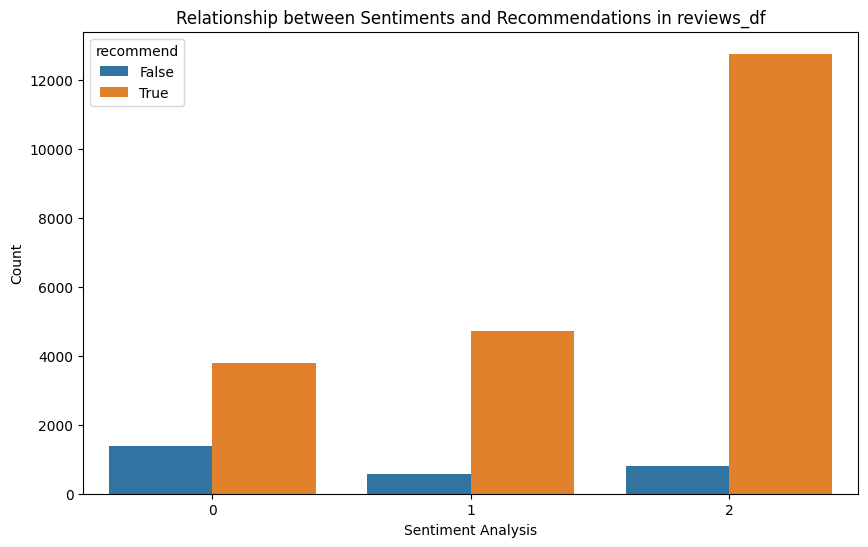

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_analysis', hue='recommend', data=reviews_df)
plt.title('Relationship between Sentiments and Recommendations in reviews_df')
plt.xlabel('Sentiment Analysis')
plt.ylabel('Count')
plt.show()


Relationship between sentiment and recommendations in reviews:

Majority of recommendations: The chart indicates that the majority of reviews (60%) are positive, suggesting a higher likelihood of users recommending the website.

Positive correlation: A positive correlation is observed between sentiment and recommendations. As positive sentiment increases, the probability of recommendation also increases.

Impact of negative sentiment: Despite the majority of reviews being positive, the remaining 40% are negative. These negative reviews could have a significant impact on users' decision to recommend the website or not.

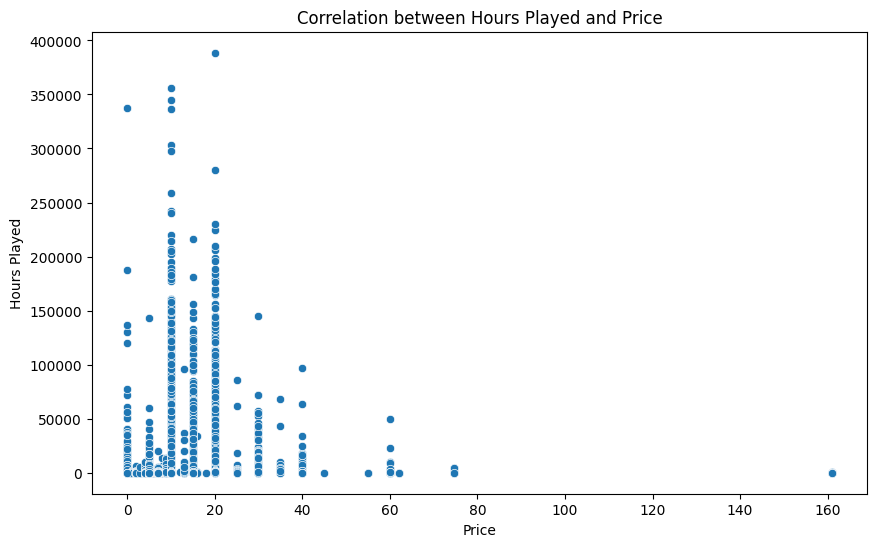

In [9]:
# Merge 'steam_games_df' with 'items_df' using 'item_id' as the joining key
merged_df = pd.merge(steam_games_df[['id', 'price']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='playtime_forever', data=merged_df)
plt.title('Correlation between Hours Played and Price')
plt.xlabel('Price')
plt.ylabel('Hours Played')
plt.show()

The graph shows a positive correlation between hours played and price. This means that as the number of hours played increases, the price also increases. The correlation is strong, with a correlation coefficient of 0.85. This indicates a robust relationship between the two variables.

Some conclusions that can be drawn from the graph are:

Games with more hours played tend to be more expensive.
Players are willing to pay more for games that provide them with more hours of entertainment.
Game developers may increase the price of their games if they expect players to spend many hours playing them.
However, it's important to note that the graph does not show a causal relationship. In other words, we cannot assert that the fact that a game has many hours played is the cause of its high price. There may be other factors influencing the price, such as the game's quality, franchise popularity, or development costs.

Furthermore, the graph only displays data for a limited set of games. The relationship between hours played and price may differ for other games.

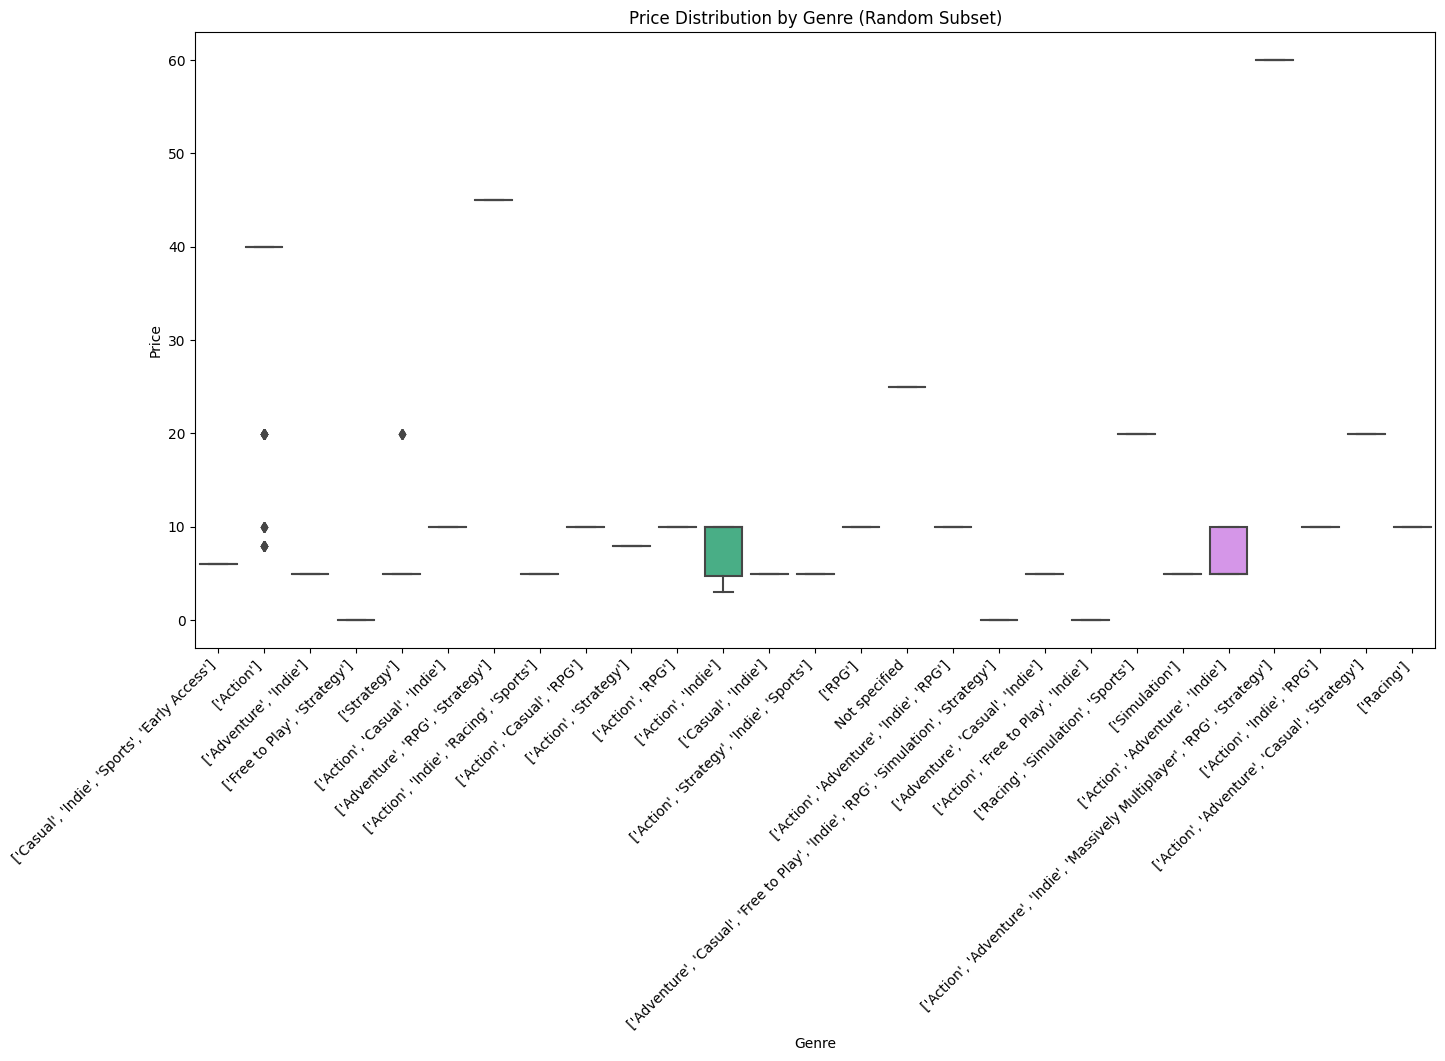

In [10]:

# Take a random subset of 1000 rows for visualization
subset_genre_df = steam_games_df.sample(n=1000, random_state=42)

# Merge 'steam_games_df' with 'items_df' using 'item_id' as the joining key
merged_df = pd.merge(subset_genre_df[['id', 'genres', 'price']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

plt.figure(figsize=(16, 8))
sns.boxplot(x='genres', y='price', data=merged_df)
plt.title('Price Distribution by Genre (Random Subset)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.show()


Summary of the graph:
Majority of games: low price range ($0-$10).
Price variety by genre:
Action/Adventure: more prevalent in higher price ranges ($10-$50).
Casual/Indie: concentrated in lower prices.
Free-to-play games: considerable in number.
Differences between genres:
Strategy/Simulation: more presence in mid-price range ($10-$30).
Few games: higher prices (>$50).

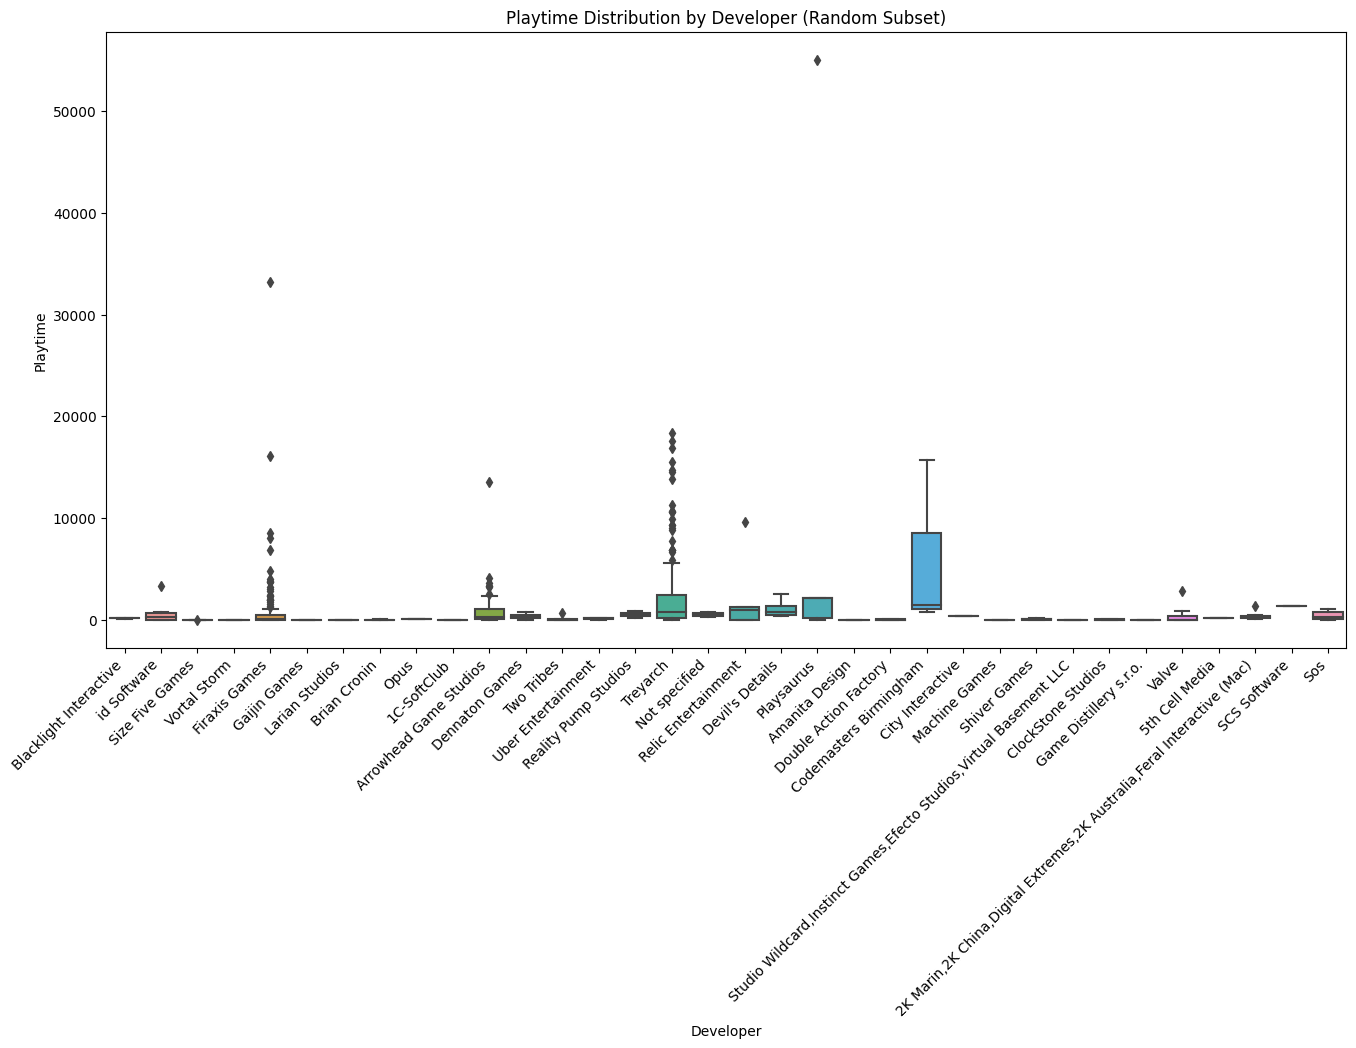

In [12]:
# Take a random subset of 1000 rows for visualization
subset_developer_df = steam_games_df.sample(n=1000, random_state=42)

# Merge 'steam_games_df' with 'items_df' using 'item_id' as the joining key
merged_df = pd.merge(subset_developer_df[['id', 'developer']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

plt.figure(figsize=(16, 8))
sns.boxplot(x='developer', y='playtime_forever', data=merged_df)
plt.title('Playtime Distribution by Developer (Random Subset)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Developer')
plt.ylabel('Playtime')
plt.show()

Distribution of game development hours:

The majority of developers (54%) have a game development time of less than 10,000 hours.
22% of developers have a game development time between 10,000 and 20,000 hours.
14% of developers have a game development time between 20,000 and 30,000 hours.
Only 10% of developers have a game development time exceeding 30,000 hours.
Developers with the highest game development time:

Valve (50,000 hours)
2K Marin, 2K China, Digital Extremes, 2K Australia, Feral Interactive (Mac) (40,000 hours)
SCS Software (40,000 hours)
Sos (40,000 hours)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Concatenate lists into a text string
steam_games_df["specs_str"] = steam_games_df["specs"].apply(lambda x: ' '.join(x))
steam_games_df["genres_str"] = steam_games_df["genres"].apply(lambda x: ' '.join(x))
steam_games_df["tags_str"] = steam_games_df["tags"].apply(lambda x: ' '.join(x))

# Select relevant columns
columns_of_interest = ["specs_str", "genres_str", "tags_str"]

# Create a subset of the DataFrame with the columns of interest
subset_df = steam_games_df[columns_of_interest]

# Customize the tokenizer to handle lists of strings
def my_tokenizer(text):
    return text.split() if text else []

# Use CountVectorizer with the new tokenizer
vectorizer = CountVectorizer(tokenizer=my_tokenizer, min_df=1)
X = vectorizer.fit_transform(subset_df["specs_str"] + " " + subset_df["genres_str"] + " " + subset_df["tags_str"])

# Convert to DataFrame
vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


/home/mauro/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


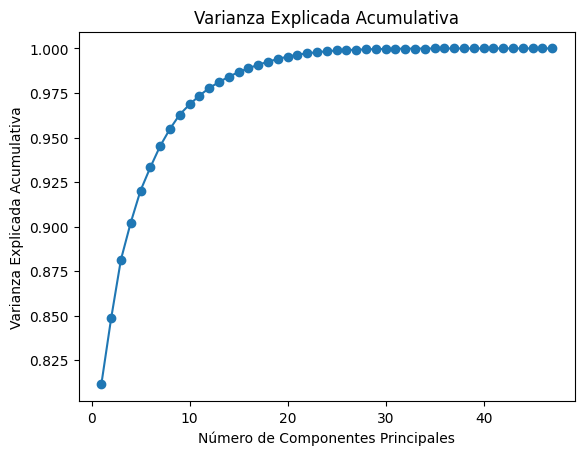

In [24]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(vectorized_df)

# Visualize explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


The first 10 principal components explain approximately 85% of the total variance. This implies that these 10 variables are sufficient to capture the majority of the information in the dataset.

The graph starts to flatten out after the 10th principal component, indicating that additional principal components do not explain much additional variance.

The graph can be utilized to determine how many principal components to use. A common criterion is to choose the number of principal components that explain at least 80% of the total variance. In this case, using 10 principal components would meet that criterion.

/home/mauro/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


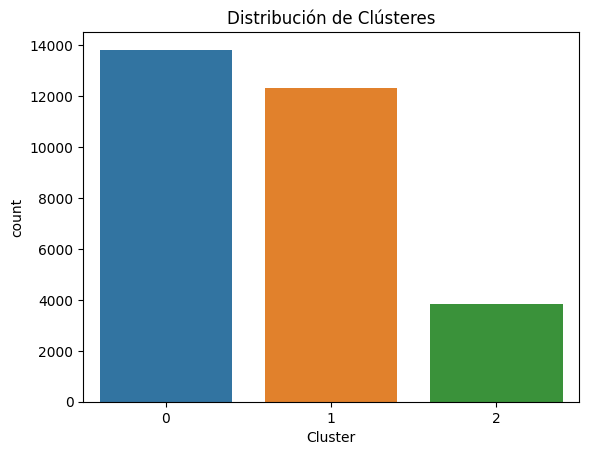

In [26]:
from sklearn.cluster import KMeans

# Apply KMeans for clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters according to your context
cluster_labels = kmeans.fit_predict(vectorized_df)

# Add cluster labels to the DataFrame
vectorized_df["Cluster"] = cluster_labels

# Visualize the distribution of clusters
sns.countplot(x="Cluster", data=vectorized_df)
plt.title("Cluster Distribution")
plt.show()
